In [410]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, explained_variance_score
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras import metrics
np.set_printoptions(threshold=10000000000000000000)
pd.set_option('display.width',100000)
pd.set_option('display.max_rows',100000)
pd.set_option('display.max_columns',100000)
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot# رسم شکل
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
from arabic_reshaper import reshape

In [411]:
# Z=pd.read_excel("D1.xlsx")
# Z=pd.read_excel("D2.xlsx")
# Z=pd.read_excel("otherdatasets\DOGE-USD.xlsx")
# Z=pd.read_excel("otherdatasets\ETH-USD.xlsx")
# Z=pd.read_excel("otherdatasets\USDT-USD.xlsx")
Z=pd.read_excel("otherdatasets\XRP-USD.xlsx")

In [412]:
Z.isnull().sum()

Date         0
Open         0
High         0
Low          0
Price        0
Adj Close    0
Volume       0
dtype: int64

In [413]:
data=Z[['Open','High','Low','Price']]

In [414]:
#scaler = StandardScaler()

In [415]:
#data_standard=scaler.fit_transform(data)
#data_standard

In [416]:
#data_standard_array=np.array(data_standard)

In [417]:
#data_standard_array.shape

In [418]:
#X=data[:,:3]

In [419]:
#X.shape

In [420]:
Y=data[['Price']]
print(Y)

         Price
0     0.297870
1     0.277466
2     0.274272
3     0.282005
4     0.292436
5     0.366676
6     0.327100
7     0.343978
8     0.319283
9     0.335177
10    0.319803
11    0.327709
12    0.327606
13    0.328230
14    0.323776
15    0.336903
16    0.351837
17    0.344803
18    0.335444
19    0.335332
20    0.347721
21    0.342523
22    0.335961
23    0.331652
24    0.283601
25    0.302710
26    0.291435
27    0.279333
28    0.278680
29    0.270321
30    0.263710
31    0.270087
32    0.280583
33    0.277159
34    0.282008
35    0.281166
36    0.272251
37    0.321860
38    0.326053
39    0.449918
40    0.561462
41    0.570798
42    0.570689
43    0.494712
44    0.526941
45    0.516308
46    0.541381
47    0.539112
48    0.571228
49    0.581572
50    0.576461
51    0.520837
52    0.528162
53    0.526606
54    0.519026
55    0.488082
56    0.482039
57    0.489751
58    0.479857
59    0.462387
60    0.383130
61    0.419115
62    0.418878
63    0.403286
64    0.447316
65    0.47

In [421]:
Y.shape

(1462, 1)

In [422]:
Y['difference']=np.log(Y).diff()

In [423]:
Y.isna().sum()

Price         0
difference    1
dtype: int64

In [424]:
Y.dropna(inplace=True)

In [425]:
Y=Y['difference']

In [426]:
Y

1      -0.070959
2      -0.011578
3       0.027804
4       0.036321
5       0.226233
6      -0.114213
7       0.050312
8      -0.074500
9       0.048581
10     -0.046954
11      0.024421
12     -0.000314
13      0.001903
14     -0.013663
15      0.039743
16      0.043373
17     -0.020195
18     -0.027518
19     -0.000334
20      0.036279
21     -0.015062
22     -0.019344
23     -0.012909
24     -0.156518
25      0.065207
26     -0.037958
27     -0.042412
28     -0.002340
29     -0.030454
30     -0.024760
31      0.023894
32      0.038125
33     -0.012278
34      0.017344
35     -0.002990
36     -0.032221
37      0.167392
38      0.012943
39      0.322005
40      0.221479
41      0.016491
42     -0.000191
43     -0.142869
44      0.063113
45     -0.020385
46      0.047420
47     -0.004200
48      0.057865
49      0.017946
50     -0.008827
51     -0.101471
52      0.013966
53     -0.002950
54     -0.014499
55     -0.061471
56     -0.012458
57      0.015872
58     -0.020409
59     -0.0370

In [427]:
#Y=Y.reshape(1,-1)

In [428]:
#Y.shape

In [429]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)
n_steps = 3
X, y = split_sequence(Y, n_steps)
# for i in range(len(X)):
#     print(X[i], y[i])

In [430]:
X.shape

(1458, 3)

In [431]:
y.shape

(1458,)

In [432]:
n_features=1

In [433]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=False)

In [434]:
from tensorflow.keras import layers
model = Sequential()
model.add(LSTM(50, activation='sigmoid', input_shape=(n_steps, n_features), recurrent_dropout=0.2))
model.add(layers.BatchNormalization())
model.add(Dense(1))
model.compile(optimizer='adam',loss="mse")

In [435]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 50)                10400     
                                                                 
 batch_normalization_12 (Bat  (None, 50)               200       
 chNormalization)                                                
                                                                 
 dense_12 (Dense)            (None, 1)                 51        
                                                                 
Total params: 10,651
Trainable params: 10,551
Non-trainable params: 100
_________________________________________________________________


In [436]:
history = model.fit(X_train, y_train, epochs=140, 
          shuffle=False, validation_split=0.2, batch_size=5, verbose=0)

In [437]:
yhat = model.predict(X_test)

In [438]:
np.sqrt(mean_squared_error(y_test, yhat))

0.005099656009316677

In [439]:
mean_squared_error(y_test, yhat)

2.6006491413359696e-05

In [440]:
mean_absolute_error(y_test, yhat)

0.005082061877576375

In [441]:
Y_P=model.predict(X)
Y_P=np.array(Y_P)

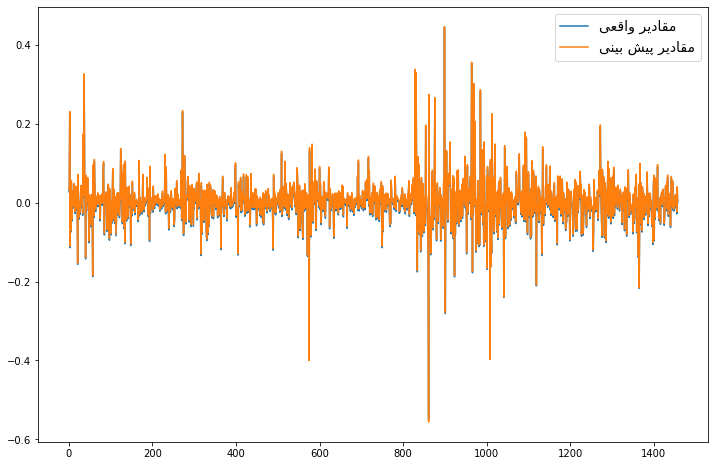

In [442]:
plt.figure(figsize=(12, 8))
plt.plot(y,label=get_display(reshape('مقادیر واقعی')))
plt.plot(Y_P.reshape(-1,1),label=get_display(reshape('مقادیر پیش بینی')))
plt.legend(loc='best',fontsize=14)
plt.show()